# Essay Score Classification with Bag-of-Words + Support Vector Machines

### Project Set-up and Data

In [1]:
#First step in any Machine Learning Project - getting 
# help from necessary libraries and leveraging powerful frameworks
import matplotlib.pyplot as plt #this library is for plotting, graphs, visualizations
import numpy as np #this library is for important for linear algebra, matrix types, and some math
import pandas as pd #really useful for reading in data and preprocessing

In [2]:
data = pd.read_csv("train.csv") #read in data from csv file
data = data.dropna() #let's get rid of the rows which have 
data.head() #let's take a look at what the top few rows look like

,essay_id,full_text,score
0,000d118,Many people have car where they live. The thin...,3.0
1,000fe60,I am a scientist at NASA that is discussing th...,3.0
2,001ab80,People always wish they had the same technolog...,4.0
3,001bdc0,"We all heard about Venus, the planet without a...",4.0
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3.0


In [3]:
data.describe()

,score
count,8510.000000
mean,2.956874
std,1.040669
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,6.000000


In [4]:
#helper function to visualize what the essay score means
def print_essay(d: pd.DataFrame, score: int, sample_no:int = 0):
    c = d[d["score"] == score]
    essay = str(c.iloc[sample_no,1])
    print(essay)


In [5]:
print("Example of essay with score: ", 1)
print_essay(data,1,0)

Example of essay with score:  1
''The Challenge of Exploring Venus'' is a informative text, Venus called the ''Evening Star''is one of the brightest point of light in the night sky,In the solar systen Venus is the secont from our sun; Earth's twin Venus is teh close planet to Earth, and occasionally the closest in distance too Earth, Venus, and Mars.

First, Venus is a hot planet, Venus has somre persent of carbon dioxide,Venus is so closer to the sumfor that reason Venus has the hottest surface temperature of any planet in iur solar system. The temoperature is the over 800 degrees fahrenheit, and the atmosphere presure is 90 times greater than what we experience on our own planet, people can't survive.

Secondly, The scientifict However, peering at Venus from a ship orbiting or hovering safely far above the planet can povide only limited insight on ground conditions because about However the light cannot penetrate th eatmosphere and it's from photography an dvideography ineffective.



In [6]:
print("Example of essay with score: ", 3)
print_essay(data,3,0)

Example of essay with score:  3
Many people have car where they live. The thing they don't know is that when you use a car alot of thing can happen like you can get in accidet or the smoke that the car has is bad to breath on if someone is walk but in VAUBAN,Germany they dont have that proble because 70 percent of vauban's families do not own cars,and 57 percent sold a car to move there. Street parkig ,driveways and home garages are forbidden on the outskirts of freiburd that near the French and Swiss borders. You probaly won't see a car in Vauban's streets because they are completely "car free" but If some that lives in VAUBAN that owns a car ownership is allowed,but there are only two places that you can park a large garages at the edge of the development,where a car owner buys a space but it not cheap to buy one they sell the space for you car for $40,000 along with a home. The vauban people completed this in 2006 ,they said that this an example of a growing trend in Europe,The unti

In [7]:
print("Example of essay with score: ", 6)
print_essay(data,6,0)

Example of essay with score:  6
Dear, Senator

The

Electoral college has been around for centuries and as time changes, things start to evolve and grow along with the time period.

Some things are meant to be changed according to the lifestyle of our people now. Hundreds of years back, the electoral college might have worked for the citizens living during that time. However, this is a new century and many people agree with the fact that the electoral college is out dated and we need to change to the election by popular vote. Firstly, because the people are putting their vote into the hands of a person whom they might not even consider the votes of their state's people . Also, the electoral college causes many issues duing the voting period.

To start off, The electoral college is a huge risk that the state's people must take each year.

You never know whether or not your electors will suddenly change their mind and vote for a candidate that you personally didn't want. In the article "

Some observations, as the **quality** and **fluency** of the essays improve, the higher the score that is awarded. For example, the essay scored 1 is very robotic, has many puntuation/grammatical mistakes, and is not clear.

The essay marked 3 is has more clarity, less mistakes, and generally reflects a GREATER degree of fluency.

The essay marked 6 was clearly written by someone fluent in English, has few mistakes, and a great degree of clarity.

We can therefore say that 
**we are trying to classify the essays with integer scores from 1 to 6 based on overall essay quality (fluency, clarity, and general writing quality)**

As we can see above, we don't need the essay_id column. But the full_text column (column 1 with 0-indexing) and score column (column 2 with 0-indexing) contain our useful information.

In other words <br> **our X (input) vector is full_text and has shape Nx1** <br>
**y (output) vector is score and has shape Nx1 (where N is number of data instances/rows)**

In [8]:
X = data.iloc[:,1] # take full_text
y = data.iloc[:,2] #take score

In [9]:
# Splitting data into traininga and testing splits is an 
# important part of Machine Learning workflow because it 
# allows us to tell if we've under/overfit our model
#on the data. So we will use the following fucntion from
#sklearn to automatically split the data into training 
#and testing splits:
from sklearn.model_selection import train_test_split 

In [10]:
#We want the test split to be 30% of the size of the total data, ie test_size = N*0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [11]:
# X_test, X_eval, y_test, y_eval = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

## Modeling: Bag-of-Words and SVM

In [12]:
# we will use sklearn CountVectorizer to make our bag of words based on word counts
from sklearn.feature_extraction.text import CountVectorizer 


# Tokenization: Convert essays to Bag-of-Words features
vectorizer = CountVectorizer(stop_words='english') #initialize the vectorizer to count English words

#create the bag of words
X_train_bow = vectorizer.fit_transform(X_train.values.astype('U')) 
X_test_bow = vectorizer.transform(X_test.values.astype('U')) 
# X_eval_bow = vectorizer.transform(X_eval.values.astype('U'))

In [13]:
#use sklearn for SVM
from sklearn.svm import SVC

#first try radial basis function as kernel function
model = SVC(kernel='rbf')  # Or try 'rbf' or 'poly' kernels
model.fit(X_train_bow, y_train)
y_pred = model.predict(X_test_bow) 

In [14]:
#Sklearn uses Accuracy as the default scoring metric
print("initial training accuracy:", model.score(X_test_bow,y_test))

initial training accuracy: 0.5534665099882491


## Hyperparamter Tuning

In [15]:
#Prepare 5 fold Cross validation for Hyper Param Tuning
from sklearn.model_selection import GridSearchCV
#these are the parameter settings we want to test
parameters = {'kernel':("linear", "poly", "rbf", "sigmoid"), 'C':[1,5, 10]}
svc = SVC() #initialzie the SVM object
clf = GridSearchCV(svc, parameters) #initialize the grid search object
clf.fit(X_train_bow,y_train) #run the hyper paramter tuning


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5, 10],
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')})

## Results

In [16]:
#extact the grid search hyper param tuning results
results_df = pd.DataFrame(clf.cv_results_)
results_df.describe() #what does the data look like


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,15.699285,0.162808,3.362757,0.032232,0.521689,0.516161,0.506774,0.505877,0.515181,0.513136,0.011704,6.250000
std,4.052592,0.100744,0.557161,0.020851,0.044249,0.045692,0.029803,0.047295,0.045180,0.041358,0.004654,3.720337
min,8.200656,0.029740,2.468196,0.007484,0.456947,0.441724,0.454456,0.428012,0.439765,0.452604,0.005188,1.000000
25%,14.477575,0.093725,3.133450,0.015220,0.478963,0.492409,0.487023,0.464006,0.481881,0.473951,0.008757,3.750000
50%,15.963558,0.144146,3.273668,0.031186,0.530333,0.517140,0.511753,0.522037,0.519589,0.521640,0.011730,5.500000
75%,18.759632,0.218138,3.591740,0.039618,0.541341,0.538443,0.523506,0.530607,0.536974,0.532558,0.015355,9.250000
max,20.143366,0.365417,4.184824,0.073314,0.585127,0.585700,0.549461,0.566112,0.581783,0.573637,0.019041,12.000000


In [17]:
results_df[["params","mean_test_score"]] #see how each model did

,params,mean_test_score
0,"{'C': 1, 'kernel': 'linear'}",0.523304
1,"{'C': 1, 'kernel': 'poly'}",0.477085
2,"{'C': 1, 'kernel': 'rbf'}",0.560319
3,"{'C': 1, 'kernel': 'sigmoid'}",0.461417
4,"{'C': 5, 'kernel': 'linear'}",0.523304
5,"{'C': 5, 'kernel': 'poly'}",0.514294
6,"{'C': 5, 'kernel': 'rbf'}",0.573637
7,"{'C': 5, 'kernel': 'sigmoid'}",0.464551
8,"{'C': 10, 'kernel': 'linear'}",0.523304
9,"{'C': 10, 'kernel': 'poly'}",0.519975


In [18]:
print(clf.best_params_) # #best model parameters
print("5-fold CV error:",clf.best_score_) # the 5-fold cross validation error of the best model

{'C': 5, 'kernel': 'rbf'}
5-fold CV error: 0.5736366058371076


In [19]:
#save the best model
mod = clf.best_estimator_
#reporting final training and testing accuracy
print("Final training accuracy",mod.score(X_train_bow,y_train))
print("Final test accuracy",mod.score(X_test_bow,y_test))


Final training accuracy 0.9943204073638856
Final test accuracy 0.564042303172738


In [20]:
#getting predicted values
y_pred = mod.predict(X_test_bow)

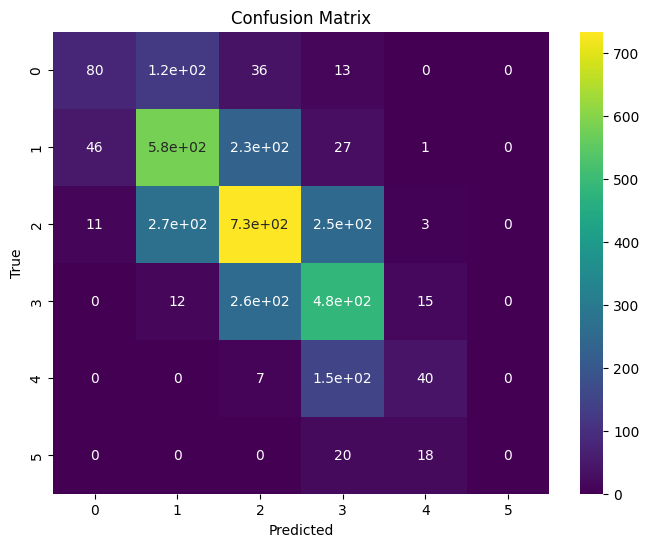

In [21]:
#let's plot a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_pred) #create confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(cm,cmap = "viridis", annot=True)

# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(6), yticklabels=range(6))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


/Users/archan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


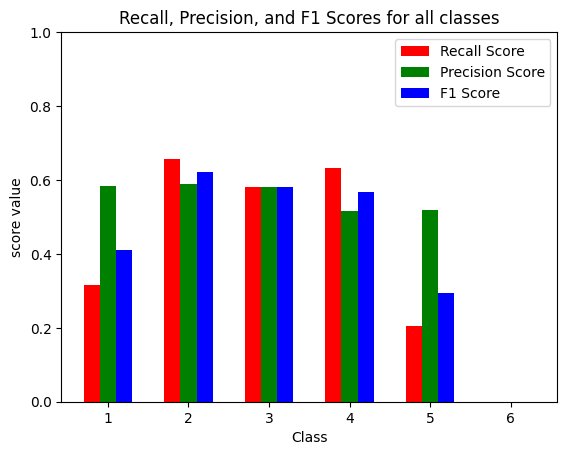

In [22]:
#plotting Recall, Precision, F1
from sklearn.metrics import recall_score, precision_score, f1_score

scores = [1,2,3,4,5,6] #scores

recall_score_vals = recall_score(y_test,y_pred,average=None) #recall scores
precision_score_vals = precision_score(y_test,y_pred,average=None) #precision scores
f1_score_vals = f1_score(y_test,y_pred,average=None) #f1 scores

width = 0.2 
x = np.arange(6)
plt.bar(x-width,recall_score_vals, width, color = "red", label = "Recall Score")
plt.bar(x,precision_score_vals, width, color = "green", label = "Precision Score")
plt.bar(x+width,f1_score_vals, width, color = "blue", label = "F1 Score")

plt.legend()
plt.title("Recall, Precision, and F1 Scores for all classes")
plt.ylabel("score value")
plt.xlabel("Class")
plt.xticks([0,1,2,3,4,5],scores)
plt.ylim((0,1))

plt.show()



## Analysis and Discussion

Text(0.5, 1.0, 'Distribution of scores in test data')

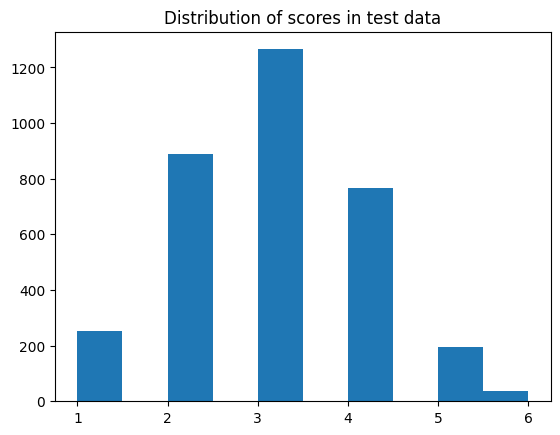

In [23]:
#let's see the distribution of the test data
plt.hist(y_test)
plt.title("Distribution of scores in test data")

As can be seen from the distribution of the test data, there isn't much data available for class 6, hence why the model fails to make predictions for the class. Overall, the model test accuracy of ~56% is very poor and evidence has been given that Support Vector Machines may not be adequate in classifying essays accurately when tokenzing essays with a bag of words.